<a href="https://colab.research.google.com/github/sreshu/MultimodalApproach/blob/main/Multimodal_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **------------------  Data Preprocessing and Cleaning --------------------------**

In [46]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/archive/MovieGenre.csv', encoding='unicode_escape')

data2 = pd.read_csv('/content/drive/MyDrive/archive/movies_metadata.csv', encoding='unicode_escape')


<ipython-input-46-d54a0268b8a0>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('/content/drive/MyDrive/archive/movies_metadata.csv', encoding='unicode_escape')


1. Inspecting Elements from both data frames -

*   "data" dataframe has poster links but the overview text column is missing

*   "data2" data frame has overview text column

*   Combining both to "data3" dataframe which would be making more sense

*   "data3" has both Text and Image data **bold text**




In [47]:
n = 140
first_n_elements = data.head(n)
tail_of_first_n_elements = first_n_elements.tail(5)

tail_of_first_n_elements

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
135,113756,http://www.imdb.com/title/tt113756,Man of the Year (1995),6.1,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
136,113952,http://www.imdb.com/title/tt113952,The Neon Bible (1995),6.2,Drama,https://images-na.ssl-images-amazon.com/images...
137,114618,http://www.imdb.com/title/tt114618,Target (1995),7.8,Drama,NaN
138,118055,http://www.imdb.com/title/tt118055,Up Close & Personal (1996),6.1,Drama|Romance,https://images-na.ssl-images-amazon.com/images...
139,115685,http://www.imdb.com/title/tt115685,The Birdcage (1996),7.0,Comedy,https://images-na.ssl-images-amazon.com/images...


In [48]:
# Take the first n elements and display the tail
n = 140
first_n_elements = data2.head(n)
tail_of_first_n_elements = first_n_elements.tail(5)

tail_of_first_n_elements

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
135,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,5757,tt0113756,en,Man of the Year,First-time director Dirk Shafer also penned th...,...,1995-09-15,209935.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He as a centerfold who revealed everything ......,Man of the Year,False,3.8,2.0
136,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,39428,tt0113952,en,The Neon Bible,"While on a train, a teenage boy thinks about h...",...,1995-08-23,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Neon Bible,False,7.2,5.0
137,False,NaN,0,[],NaN,124639,tt0114618,en,Target,A subtle yet violent commentary on feudal lords.,...,1995-08-01,0.0,122.0,[],Released,NaN,Target,False,0.0,0.0
138,False,NaN,60000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,9302,tt0118055,en,Up Close & Personal,Tally Atwater has a dream: to be a prime-time ...,...,1996-03-01,0.0,119.0,"[{'iso_639_1': 'fr', 'name': 'FranÃ§ais'}]",Released,"Every Day we Have, is One More Than We Deserve.",Up Close & Personal,False,5.9,51.0
139,False,NaN,31000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,11000,tt0115685,en,The Birdcage,A gay cabaret owner and his drag queen compani...,...,1996-03-08,185260553.0,117.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Come as you are.,The Birdcage,False,6.7,303.0


In [49]:
data.tail(5)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
40103,83168,http://www.imdb.com/title/tt83168,Tanya's Island (1980),4.3,Drama,https://images-na.ssl-images-amazon.com/images...
40104,82875,http://www.imdb.com/title/tt82875,Pacific Banana (1981),4.7,Comedy,https://images-na.ssl-images-amazon.com/images...
40105,815258,http://www.imdb.com/title/tt815258,Werewolf in a Womens Prison (2006),4.5,Horror,https://images-na.ssl-images-amazon.com/images...
40106,79142,http://www.imdb.com/title/tt79142,Xiao zi ming da (1979),6.5,Action|Comedy,https://images-na.ssl-images-amazon.com/images...
40107,70710,http://www.imdb.com/title/tt70710,Snatched (1973),6.5,Crime|Drama|Thriller,NaN


In [50]:
data2.tail(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,Ø±Ú¯ Ø®ÙØ§Ø¨,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'ÙØ§Ø±Ø³Û'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [51]:
data.head(11)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...
5,113277,http://www.imdb.com/title/tt113277,Heat (1995),8.2,Action|Crime|Drama,https://images-na.ssl-images-amazon.com/images...
6,114319,http://www.imdb.com/title/tt114319,Sabrina (1995),6.3,Comedy|Drama,https://images-na.ssl-images-amazon.com/images...
7,112302,http://www.imdb.com/title/tt112302,Tom and Huck (1995),5.6,Adventure|Comedy|Drama,https://images-na.ssl-images-amazon.com/images...
8,114576,http://www.imdb.com/title/tt114576,Sudden Death (1995),5.7,Action|Crime|Thriller,https://images-na.ssl-images-amazon.com/images...
9,113189,http://www.imdb.com/title/tt113189,GoldenEye (1995),7.2,Action|Adventure|Thriller,https://images-na.ssl-images-amazon.com/images...


In [52]:
len(data['Genre'].unique())

1308


**2 . Exploratory Data Analysis**

<Axes: >

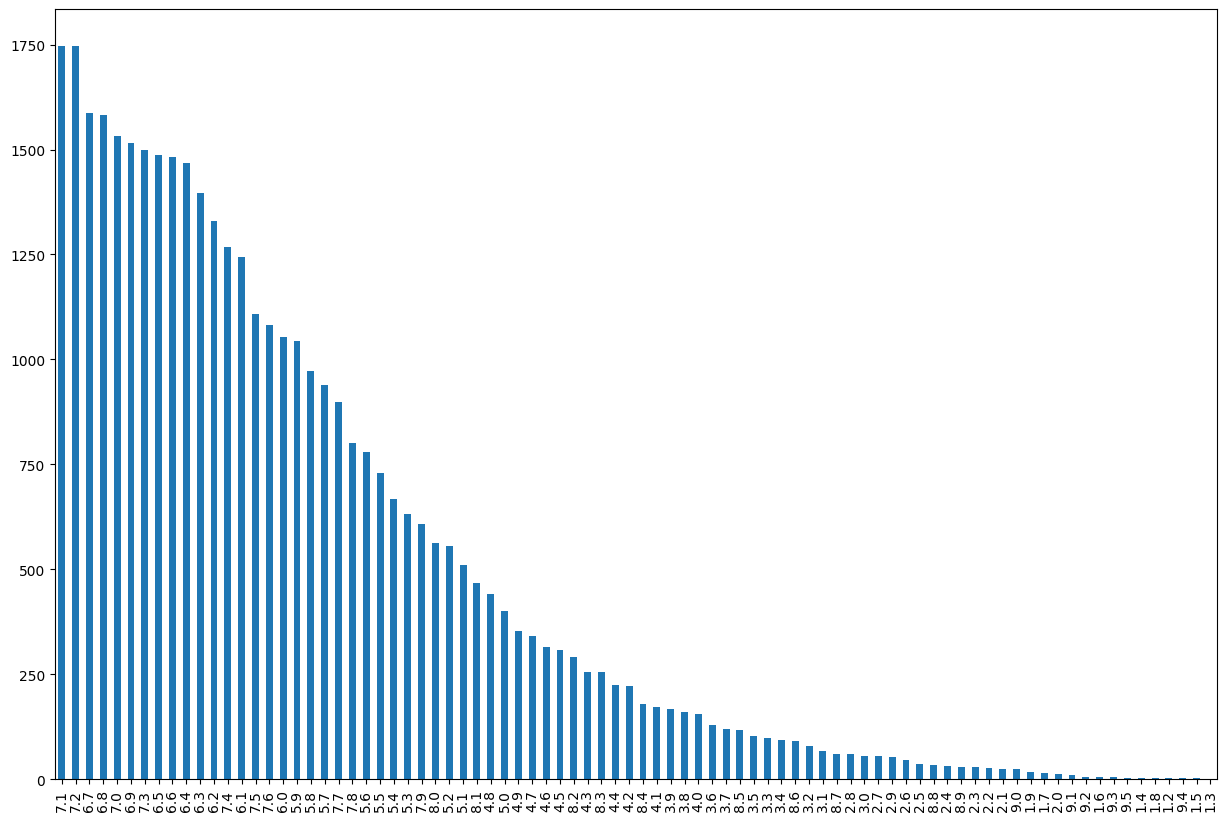

In [53]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(15,10)
data['IMDB Score'].value_counts().plot.bar(fig)


In [54]:
data.dropna(inplace=True)

<ipython-input-115-8b86d21cd77c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['IMDB Score'], color='green')


<Axes: xlabel='IMDB Score', ylabel='Density'>

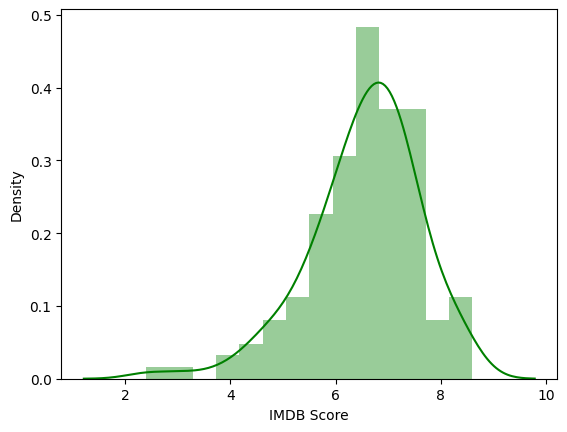

In [115]:
import seaborn as sns

sns.distplot(data['IMDB Score'], color='green')

In [118]:
# Read the first row and the "Poster" column
first_row_poster = data.loc[0, "Poster"]

# Print or use the data from the "Poster" column in the first row as needed
print(first_row_poster)

https://images-na.ssl-images-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_UX182_CR0,0,182,268_AL_.jpg


**3. Displaying images from the url links mentioned in dataset**



```
# This is formatted as code
```



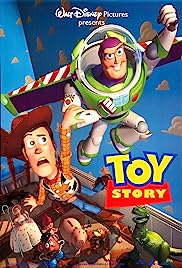

In [58]:
from IPython.display import display, Image
import requests
from PIL import Image as PILImage
from io import BytesIO

# Read the first row and the "Poster" column, Replace this URL with the actual image URL, Fetch the image
first_row_poster = data.loc[0, "Poster"]

image_url = first_row_poster

response = requests.get(image_url)

# Check if the request was successful (status code 200), Open the image using PIL
if response.status_code == 200:
    img = PILImage.open(BytesIO(response.content))

    display(Image(data=response.content))
else:
    print(f"Failed to fetch image. Status code: {response.status_code}")


# Create a new DataFrame 'data3' by combining existing columns and selected columns from 'data' and 'data2' dataframes






In [59]:
selected_columns = ["tagline", "overview", "runtime"]
data = data.head(140)
data2 = data2.head(140)

data3 = pd.concat([data, data2[selected_columns]], axis=1)

data3.head(20)


,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,tagline,overview,runtime
0,114709.0,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,NaN,"Led by Woody, Andy's toys live happily in his ...",81.0
1,113497.0,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,104.0
2,113228.0,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,101.0
3,114885.0,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...",127.0
4,113041.0,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,106.0
5,113277.0,http://www.imdb.com/title/tt113277,Heat (1995),8.2,Action|Crime|Drama,https://images-na.ssl-images-amazon.com/images...,A Los Angeles Crime Saga,"Obsessive master thief, Neil McCauley leads a ...",170.0
6,114319.0,http://www.imdb.com/title/tt114319,Sabrina (1995),6.3,Comedy|Drama,https://images-na.ssl-images-amazon.com/images...,You are cordially invited to the most surprisi...,An ugly duckling having undergone a remarkable...,127.0
7,112302.0,http://www.imdb.com/title/tt112302,Tom and Huck (1995),5.6,Adventure|Comedy|Drama,https://images-na.ssl-images-amazon.com/images...,The Original Bad Boys.,"A mischievous young boy, Tom Sawyer, witnesses...",97.0
8,114576.0,http://www.imdb.com/title/tt114576,Sudden Death (1995),5.7,Action|Crime|Thriller,https://images-na.ssl-images-amazon.com/images...,Terror goes into overtime.,International action superstar Jean Claude Van...,106.0
9,113189.0,http://www.imdb.com/title/tt113189,GoldenEye (1995),7.2,Action|Adventure|Thriller,https://images-na.ssl-images-amazon.com/images...,No limits. No fears. No substitutes.,James Bond must unmask the mysterious head of ...,130.0


In [60]:
data3 = pd.read_csv('/content/drive/MyDrive/archive/data3.csv', encoding='unicode_escape')


In [61]:
data3

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,tagline,overview,runtime
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,NaN,"Led by Woody, Andy's toys live happily in his ...",81.0
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,104.0
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,101.0
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...",127.0
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,106.0
...,...,...,...,...,...,...,...,...,...
135,113756,http://www.imdb.com/title/tt113756,Man of the Year (1995),6.1,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,He as a centerfold who revealed everything ......,First-time director Dirk Shafer also penned th...,86.0
136,113952,http://www.imdb.com/title/tt113952,The Neon Bible (1995),6.2,Drama,https://images-na.ssl-images-amazon.com/images...,NaN,"While on a train, a teenage boy thinks about h...",91.0
137,114618,http://www.imdb.com/title/tt114618,Target (1995),7.8,Drama,NaN,NaN,A subtle yet violent commentary on feudal lords.,122.0
138,118055,http://www.imdb.com/title/tt118055,Up Close & Personal (1996),6.1,Drama|Romance,https://images-na.ssl-images-amazon.com/images...,"Every Day we Have, is One More Than We Deserve.",Tally Atwater has a dream: to be a prime-time ...,119.0


**4. Genere seperation**

*   seperate genre for each movie and count genres




In [85]:
#seperate genre for each movie and count genres
sss = data3['Genre'].str.split(pat='|', expand=True).fillna(0)
sss.columns = ['genre1', 'genre2', 'genre3']
cols = sss.columns
sss[cols] = sss[cols].astype('category')
ss1 = sss.copy()
cat_columns = ss1.select_dtypes(['category']).columns

#count genres (non zeros)
ss1[cat_columns] = ss1[cat_columns].apply(lambda x: x.cat.codes)
ss1['genre_count'] = ss1[cols].gt(0).sum(axis=1) #count greater than 0 values for less than: df[cols].lt(0).sum(axis=1), for equal==0: df[cols].eq(0).sum(axis=1)

#assigning everything to same dataframe
data3['genre_count'] = ss1['genre_count']
data3[cols] = sss[cols]

data3.head(5)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,tagline,overview,runtime,genre_label,genre_count,genre1,genre2,genre3
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,NaN,"Led by Woody, Andy's toys live happily in his ...",81.0,17,3,Animation,Adventure,Comedy
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,104.0,1,2,Action,Adventure,Family
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,101.0,36,2,Comedy,Romance,0
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...",127.0,31,3,Comedy,Drama,Romance
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,106.0,32,3,Comedy,Family,Romance


# Create new dataframe using useful column names only

In [86]:
new_columns = ["imdbId", "Imdb Link", "Title", "Poster", "overview", "genre1"]
new_df = pd.DataFrame(columns=new_columns)

# Copy data from the original DataFrame to the new DataFrame
new_df["imdbId"] = data3["imdbId"]
new_df["Imdb Link"] = data3["Imdb Link"]
new_df["Title"] = data3["Title"]
new_df["Genre"] = data3["Genre"]
new_df["Poster"] = data3["Poster"]
new_df["overview"] = data3["overview"]
new_df["genre1"] = data3["genre1"]

new_df.head(5)

,imdbId,Imdb Link,Title,Poster,overview,genre1,Genre
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),https://images-na.ssl-images-amazon.com/images...,"Led by Woody, Andy's toys live happily in his ...",Animation,Animation|Adventure|Comedy
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),https://images-na.ssl-images-amazon.com/images...,When siblings Judy and Peter discover an encha...,Action,Action|Adventure|Family
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),https://images-na.ssl-images-amazon.com/images...,A family wedding reignites the ancient feud be...,Comedy,Comedy|Romance
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),https://images-na.ssl-images-amazon.com/images...,"Cheated on, mistreated and stepped on, the wom...",Comedy,Comedy|Drama|Romance
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),https://images-na.ssl-images-amazon.com/images...,Just when George Banks has recovered from his ...,Comedy,Comedy|Family|Romance


In [87]:
# Assuming data3 is your DataFrame
unique_genre1 = new_df["genre1"].unique()

# Display the unique elements in the "genre1" column
print(unique_genre1)


['Animation', 'Action', 'Comedy', 'Adventure', 'Biography', ..., 'Fantasy', 'Mystery', 'Romance', 'Sci-Fi', 'Documentary']
Length: 12
Categories (12, object): ['Action', 'Adventure', 'Animation', 'Biography', ..., 'Fantasy',
                          'Mystery', 'Romance', 'Sci-Fi']


In [88]:
# Assuming data3 is your DataFrame
labels, unique_genre1 = pd.factorize(new_df["genre1"])

# Add a new column "genre_label" to the DataFrame with the assigned labels
new_df["genre_label"] = labels

# Display the DataFrame with the added "genre_label"column
print(new_df["genre_label"])

0      0
1      1
2      2
3      2
4      2
      ..
135    2
136    6
137    6
138    6
139    2
Name: genre_label, Length: 140, dtype: int64


Train images and overview text

In [89]:
new_df

,imdbId,Imdb Link,Title,Poster,overview,genre1,Genre,genre_label
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),https://images-na.ssl-images-amazon.com/images...,"Led by Woody, Andy's toys live happily in his ...",Animation,Animation|Adventure|Comedy,0
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),https://images-na.ssl-images-amazon.com/images...,When siblings Judy and Peter discover an encha...,Action,Action|Adventure|Family,1
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),https://images-na.ssl-images-amazon.com/images...,A family wedding reignites the ancient feud be...,Comedy,Comedy|Romance,2
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),https://images-na.ssl-images-amazon.com/images...,"Cheated on, mistreated and stepped on, the wom...",Comedy,Comedy|Drama|Romance,2
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),https://images-na.ssl-images-amazon.com/images...,Just when George Banks has recovered from his ...,Comedy,Comedy|Family|Romance,2
...,...,...,...,...,...,...,...,...
135,113756,http://www.imdb.com/title/tt113756,Man of the Year (1995),https://images-na.ssl-images-amazon.com/images...,First-time director Dirk Shafer also penned th...,Comedy,Comedy|Romance,2
136,113952,http://www.imdb.com/title/tt113952,The Neon Bible (1995),https://images-na.ssl-images-amazon.com/images...,"While on a train, a teenage boy thinks about h...",Drama,Drama,6
137,114618,http://www.imdb.com/title/tt114618,Target (1995),NaN,A subtle yet violent commentary on feudal lords.,Drama,Drama,6
138,118055,http://www.imdb.com/title/tt118055,Up Close & Personal (1996),https://images-na.ssl-images-amazon.com/images...,Tally Atwater has a dream: to be a prime-time ...,Drama,Drama|Romance,6


In [93]:
# Assuming new_df is your DataFrame
path = "/content/drive/MyDrive/archive/"
csv_file_path = os.path.join(path, "new_df.csv")

new_df.to_csv(csv_file_path, index=False)

print(f"DataFrame saved to: {csv_file_path}")


DataFrame saved to: /content/drive/MyDrive/archive/new_df.csv


# **SCRIPT FOR DATA PREPARATION USED IN MY LAPTOP , COPY PASTING HERE FOR REFERENCE**

**5. Script to fetch URL links and dump the poster images in the posters folder** **bold text**

*   Assuming you have a DataFrame with a column named 'poster_link'

*   Replace 'your_data.csv' with the actual file containing your data



In [ ]:
import pandas as pd
import requests
import os


df = pd.read_csv('./data3.csv')

# Create a folder to save the posters
folder_path = 'posters'
os.makedirs(folder_path, exist_ok=True)

# Download and save the posters
for index, row in df.iterrows():
    poster_link = row['Poster']
    response = requests.get(poster_link)

    if response.status_code == 200:
        file_extension = poster_link.split('.')[-1]

        poster_path = os.path.join(folder_path, '{}.{}'.format(index + 1, file_extension))
        with open(poster_path, 'wb') as img_file:
            img_file.write(response.content)
    else:
        print("Failed to download poster from link {poster_link}")

print("Download and save process complete.")

***Read new data frame from the folder*** *italicized text*

In [104]:
new_df = pd.read_csv('/content/drive/MyDrive/archive/new_df.csv', encoding='unicode_escape')


In [105]:
new_df

,imdbId,Imdb Link,Title,Poster,overview,genre1,Genre,genre_label
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),https://images-na.ssl-images-amazon.com/images...,"Led by Woody, Andy's toys live happily in his ...",Animation,Animation|Adventure|Comedy,0
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),https://images-na.ssl-images-amazon.com/images...,When siblings Judy and Peter discover an encha...,Action,Action|Adventure|Family,1
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),https://images-na.ssl-images-amazon.com/images...,A family wedding reignites the ancient feud be...,Comedy,Comedy|Romance,2
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),https://images-na.ssl-images-amazon.com/images...,"Cheated on, mistreated and stepped on, the wom...",Comedy,Comedy|Drama|Romance,2
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),https://images-na.ssl-images-amazon.com/images...,Just when George Banks has recovered from his ...,Comedy,Comedy|Family|Romance,2
...,...,...,...,...,...,...,...,...
135,113756,http://www.imdb.com/title/tt113756,Man of the Year (1995),https://images-na.ssl-images-amazon.com/images...,First-time director Dirk Shafer also penned th...,Comedy,Comedy|Romance,2
136,113952,http://www.imdb.com/title/tt113952,The Neon Bible (1995),https://images-na.ssl-images-amazon.com/images...,"While on a train, a teenage boy thinks about h...",Drama,Drama,6
137,114618,http://www.imdb.com/title/tt114618,Target (1995),NaN,A subtle yet violent commentary on feudal lords.,Drama,Drama,6
138,118055,http://www.imdb.com/title/tt118055,Up Close & Personal (1996),https://images-na.ssl-images-amazon.com/images...,Tally Atwater has a dream: to be a prime-time ...,Drama,Drama|Romance,6




# **----------------------   Train , Test and Inference  --------------------------**











In [107]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch
import torchvision.transforms as transforms
from tqdm import tqdm
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torchvision import models
import torch.nn as nn
import torch.optim as optim



folder_path = "/content/drive/MyDrive/archive/posters"

n = 50

# Step 1: Read Images from a Folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Step 2: Create a Dataset for Text and Image
class MultimodalDataset(Dataset):
    def __init__(self, dataframe, folder_path, transform=None):
        self.dataframe = dataframe
        self.folder_path = folder_path
        self.transform = transform
        self.label_encoder = LabelEncoder()
        self.dataframe['genre_encoded'] = self.label_encoder.fit_transform(dataframe['genre1'])

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_index = idx + 1
        img_name = os.path.join(self.folder_path, str(img_index) + '.jpg')
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        text = self.dataframe.iloc[idx, 4]

        label = torch.tensor(self.dataframe.iloc[idx, -1])

        return {'image': image, 'text': text, 'label': label}

# Define image transformations, Split dataset into training and testing sets, Define data loaders
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
multimodal_dataset = MultimodalDataset(data3.head(n), folder_path, transform=image_transform)


train_size = 0.8
train_dataset, test_dataset = train_test_split(multimodal_dataset, test_size=1 - train_size, random_state=42)


train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 3: Define the CNN model for image classification
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Step 4: Define the BERT model for text classification
class BERTModel(nn.Module):
    def __init__(self, num_classes):
        super(BERTModel, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

    def forward(self, input_ids, attention_mask):
        return self.bert(input_ids, attention_mask=attention_mask).logits

# Step 5: Define the Multimodal Model
class MultimodalModel(nn.Module):
    def __init__(self, num_classes_image, num_classes_text):
        super(MultimodalModel, self).__init__()
        self.cnn_model = CNNModel(num_classes_image)
        self.bert_model = BERTModel(num_classes_text)

    def forward(self, image, text_input_ids, text_attention_mask):
        image_output = self.cnn_model(image)
        text_output = self.bert_model(text_input_ids, attention_mask=text_attention_mask)
        combined_output = torch.cat((image_output, text_output), dim=1)
        return combined_output



<ipython-input-107-2759d9b44def>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe['genre_encoded'] = self.label_encoder.fit_transform(dataframe['genre1'])


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


Epoch 1/13: Train Loss: 3.1463, Train Accuracy: 0.0500, 


Evaluating: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


Epoch 2/13: Train Loss: 2.8507, Train Accuracy: 0.1750, 


Evaluating: 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


Epoch 3/13: Train Loss: 2.7011, Train Accuracy: 0.2750, 


Evaluating: 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


Epoch 4/13: Train Loss: 2.6434, Train Accuracy: 0.4000, 


Evaluating: 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


Epoch 5/13: Train Loss: 2.4809, Train Accuracy: 0.4500, 


Evaluating: 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


Epoch 6/13: Train Loss: 2.2594, Train Accuracy: 0.5500, 


Evaluating: 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]


Epoch 7/13: Train Loss: 2.2110, Train Accuracy: 0.5500, 


Evaluating: 100%|██████████| 1/1 [00:04<00:00,  4.70s/it]


Epoch 8/13: Train Loss: 2.0497, Train Accuracy: 0.6500, 


Evaluating: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]


Epoch 9/13: Train Loss: 1.9306, Train Accuracy: 0.7250, 


Evaluating: 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]


Epoch 10/13: Train Loss: 1.8393, Train Accuracy: 0.8500, 


Evaluating: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


Epoch 11/13: Train Loss: 1.6376, Train Accuracy: 0.9250, 


Evaluating: 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]


Epoch 12/13: Train Loss: 1.6256, Train Accuracy: 0.8750, 


Evaluating: 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


Epoch 13/13: Train Loss: 1.5430, Train Accuracy: 0.9500, 
Model saved to: /content/drive/MyDrive/archive/multimodal_model.pth


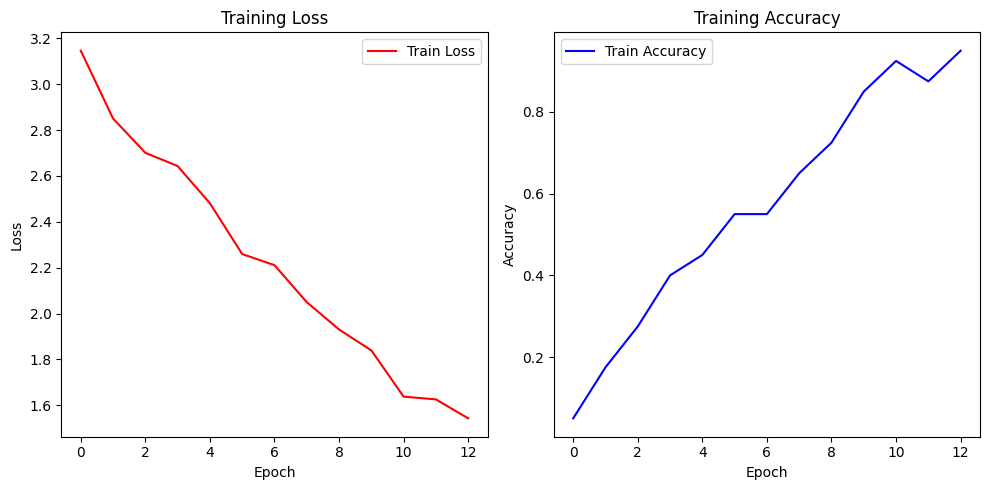

In [109]:
from PIL import Image

import os
import pickle
import matplotlib.pyplot as plt


# Step 6: Training the Multimodal Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes_image = len(new_df['genre1'].unique())
num_classes_text = len(new_df['genre1'].unique())

multimodal_model = MultimodalModel(num_classes_image, num_classes_text).to(device)

optimizer = optim.AdamW(multimodal_model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

epochs = 13

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

label_encoder = LabelEncoder()
new_df['genre1_code'] = label_encoder.fit_transform(new_df['genre1'])

label_encoder_path = "/content/drive/MyDrive/archive/label_encoder.pkl"
with open(label_encoder_path, 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

for epoch in range(epochs):
    multimodal_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{epochs}'):
        images = batch['image'].to(device)
        texts = batch['text']
        labels = batch['label'].to(device)

        # Tokenize the text
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        text_inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
        input_ids = text_inputs['input_ids'].to(device)
        attention_mask = text_inputs['attention_mask'].to(device)

        optimizer.zero_grad()
        outputs = multimodal_model(images, input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_dataloader)
    train_accuracy = correct_train / total_train

    # Validation
    multimodal_model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for batch in tqdm(test_dataloader, desc='Evaluating'):
            images = batch['image'].to(device)
            texts = batch['text']
            labels = batch['label'].numpy()

            # Tokenize the text
            tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
            text_inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
            input_ids = text_inputs['input_ids'].to(device)
            attention_mask = text_inputs['attention_mask'].to(device)

            outputs = multimodal_model(images, input_ids, attention_mask)
            loss = criterion(outputs, torch.tensor(labels).to(device))

            val_loss += loss.item()

            # Calculate validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_val += len(labels)
            correct_val += (predicted == torch.tensor(labels).to(device)).sum().item()

    val_accuracy = correct_val / total_val
    val_loss /= len(test_dataloader)

    # Store metrics
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{epochs}: "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, ")

# Step 9: Save the trained model
model_save_path = "/content/drive/MyDrive/archive/multimodal_model.pth"
torch.save(multimodal_model.state_dict(), model_save_path)
print(f"Model saved to: {model_save_path}")

# Step 10: Plotting
plt.figure(figsize=(10, 5))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', color='red')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# **INFERENCE AND PREDICT THE GENRE ON THE BASIS OF OVERVIEW TEXT AND POSTER IMAGE**

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


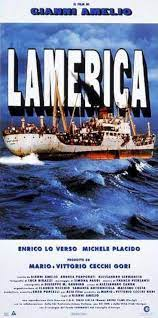

Last Overview Text:
Tally Atwater has a dream: to be a prime-time network newscaster. She pursues this dream with nothing but ambition, raw talent and a homemade demo tape. Warren Justice is a brilliant, hard edged, veteran newsman. He sees Tally has talent and becomes her mentor. TallyÃÂÃÂ¢ÃÂÃÂÃÂÃÂs career takes a meteoric rise and she and Warren fall in love. The romance that results is as intense and revealing as television news itself. Yet, each breaking story, every videotaped crisis that brings them together, also threatens to drive them apart...
Predicted Genre Label: Crime


In [112]:
import torch
from transformers import BertTokenizer
from PIL import Image
import os
from IPython.display import display

model_save_path = "/content/drive/MyDrive/archive/multimodal_model.pth"

# Step 11: Load the saved model
loaded_model = MultimodalModel(num_classes_image, num_classes_text)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()

label_encoder_path = "/content/drive/MyDrive/archive/label_encoder.pkl"  # Update with your actual path
with open(label_encoder_path, 'rb') as le_file:
    label_encoder = pickle.load(le_file)

# Step 12: Load one image and its associated overview text
folder_path = "/content/drive/MyDrive/archive/posters"

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
last_image_path = os.path.join(folder_path, image_files[-2])

image = Image.open(last_image_path).convert('RGB')

last_overview_text = new_df['overview'].iloc[-2]

display(image)

print("Last Overview Text:")
print(last_overview_text)

# Step 13: Preprocess the image and text for prediction
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

input_image = image_transform(image).unsqueeze(0)  # Add batch dimension

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text_inputs = tokenizer(last_overview_text, return_tensors='pt', padding=True, truncation=True)
input_ids = text_inputs['input_ids']
attention_mask = text_inputs['attention_mask']

# Step 14: Make predictions
with torch.no_grad():
    input_image = input_image.to(device)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)

    # Forward pass
    outputs = loaded_model(input_image, input_ids, attention_mask)
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()

# Step 15: Decode the predicted genre label using the label encoder
predicted_genre_label = label_encoder.inverse_transform(predictions)[0]


# Step 16: Display the results
print(f"Predicted Genre Label: {predicted_genre_label}")
